In [4]:
!pip3 install sympy

  Using cached https://files.pythonhosted.org/packages/21/21/f4105795ca7f35c541d82c5b06be684dd2f5cb4f508fb487cd7aea4de776/sympy-1.4-py2.py3-none-any.whl


In [266]:
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import exp, Symbol, symbols
import math
from sympy import poly

In [267]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

s = symbols("s")

def xfer_fun_to_diffeqs(extvar,name,COEFF,POLY):
    sym = lambda i : "%s%d" % (name,i)
    expr = POLY.expand()
    pexpr = poly(expr)
    n = pexpr.degree()
    coeffs = pexpr.all_coeffs()
    stvars = list(map(lambda i : sym(i), range(n)))
    diffeqs = {}
    diffeqs[sym(0)] = [(COEFF,extvar)]
    for i in range(0,n):
        c = -coeffs[i+1]/coeffs[0]
        diffeqs[sym(0)].append((c,sym(i)))
        
    for i in range(0,n-1):
        diffeqs[sym(i+1)] = [(1.0,sym(i))]
    
    for v,e in diffeqs.items():
        print("%s = %s" % (v,e))
        
    return diffeqs

In [268]:
def butter(extvar,fvar,freq_cutoff,degree=1):
    degs = [
        (s+1),
        (s+1)*(s**2+s+1),
        (s**2+0.7654*s+1)*(s**2+1.8478*s+1),
        (s+1)*(s**2+0.6180*s+1)*(s**2+1.6180*s+1),
        (s**2+0.5176*s+1)*(s**2+1.4142*s+1)*(s**2+1.9319*s+1),
        (s+1)*(s**2+0.4450*s+1)*(s**2+1.2470*s+1)*(s**2+1.8019*s+1)
    ]
    wc = freq_cutoff/(2.0*math.pi)
    expr = degs[degree-1].subs(s,s/wc)
    G0 = 1.0
    return xfer_fun_to_diffeqs(extvar,fvar,1.0,expr)

In [418]:
def cheby(extvar,fvar,freq_cutoff,degree=1):
    #Chebyshev Prototype Functions in Cascade Form with 0.5-dB Ripple (ε=0.3493)
    degs = [
        (s+1),
        (s+1)*(s**2+s+1),
        0.7157*(s+0.6265)*(s**2+0.6265*s+1.1425),
        0.3579*(s**2+0.3507*s+1.0635)*(s**2+0.8467*s+0.3564),
        0.1789*(s+0.3623)*(s**2+0.2239*s+1.0358)*(s**2+0.5862*s+0.4768),
        0.0895*(s**2+0.1553*s+1.0230)*(s**2+0.4243*s+0.5900)*(s**2+0.5796*s+0.1570)
    ]
    wc = freq_cutoff/(2.0*math.pi)
    expr = degs[degree-1].subs(s,s/wc)
    G0 = 1.0
    return toxfer_fun_to_diffeqs(extvar,fvar,1.0,expr)

In [442]:
model = cheby("z","x",10,3)

x0 = [(1.0, 'z'), (-1.86593255280938, 'x0'), (-4.90736338374962, 'x1'), (-5.27920690750823, 'x2'), (-4.82841507794506, 'x3'), (-1.82717921231874, 'x4')]
x1 = [(1.0, 'x0')]
x2 = [(1.0, 'x1')]
x3 = [(1.0, 'x2')]
x4 = [(1.0, 'x3')]


In [443]:
stvars = list(model.keys())
stvars.sort()

In [444]:
def deriv(x,t):
    vals = dict(zip(stvars,x))
    vals['z'] = infxn(t)
    derivs = dict(map(lambda s: (s,()), stvars))
    for dv,terms in model.items():
        derivs[dv] = 0.0
        for c,v in terms:
            derivs[dv] += c*vals[v]
            
    dx = [0]*len(x)
    for i,v in enumerate(stvars):
        dx[i] = derivs[v]
    
    return dx

In [445]:
def infxn(t):
    freq = 50.0
    return math.sin(freq/(2.0*math.pi)*t)

In [446]:
x0 = [0.0]*len(stvars)
t = np.linspace(0., 30., 10000)
v = spi.odeint(deriv, x0, t)

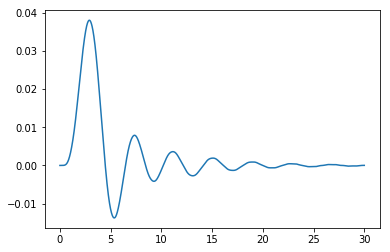

In [447]:
i = list(map(lambda i : infxn(i),t))
o = list(map(lambda els: els[-1],v))
plt.plot(t,o)

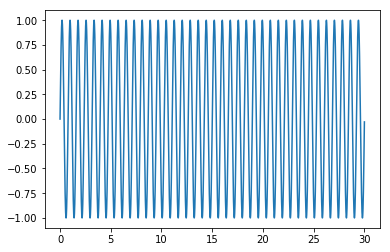

In [448]:

plt.plot(t,i)